#### Exercise 3.6

Chained version, original shape is *not* preserved in the boolean array(s):

In [33]:
import numpy as np
a = np.arange(24).reshape( (3,8) )
c = a[a > 4]
c = c[c <= 20]
c = c[c%2 == 0]
print(a.shape, c.shape)
c

(3, 8) (8,)


array([ 6,  8, 10, 12, 14, 16, 18, 20])

Using the bit-wise `&` (logical AND) operator (recommended):

In [34]:
b = (a > 4)# 1st condition
b = b & (a <= 20) # 2nd condition
b = b & (a%2 == 0) # 3rd condition
print(a.shape, b.shape)
a[b]

(3, 8) (3, 8)


array([ 6,  8, 10, 12, 14, 16, 18, 20])

#### Exercise 3.9 a-d

In [35]:
import numpy as np
from matplotlib import pyplot as plt
# required in Jupyter
%matplotlib inline 

data = np.loadtxt('noisy_decay.txt')
# what do we got
data.shape

(400, 2)

So we got 400 rows and two culomns. Let's plot the data:

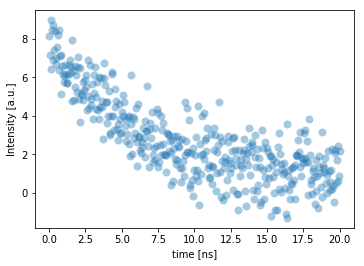

In [36]:
time = data[:,0] # x-values
values = data[:,1] # y-values

fig, ax = plt.subplots()
ax.plot(time, values,'o', alpha = 0.4, ms = 8)
ax.set_xlabel('time [ns]')
ax.set_ylabel('Intensity [a.u.]')

Ok, then on to the implementation of our model:

In [37]:
def exp_decay(t, tau, A = 4, c = 2 ):
    y = A * np.exp(-t/tau) + c
    
    return y

And now some example model output together with the data:

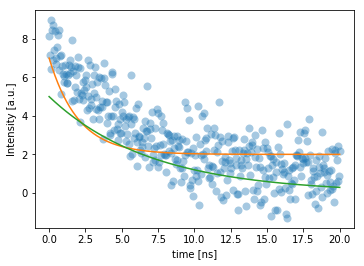

In [38]:
time = data[:,0] # time values from the data!

output1 = exp_decay(t = time, tau = 2, A = 5)
output2 = exp_decay(t = time, tau = 7, A = 5, c = 0)

fig, ax = plt.subplots()
ax.plot(time, values, 'o', alpha = 0.4, ms = 8)
ax.plot(time, output1)
ax.plot(time, output2)


# add some axis labels again
ax.set_xlabel('time [ns]')
ax.set_ylabel('Intensity [a.u.]')

Well, guessing parameters isn't really scientific, is it? Our google search brought up this [SciPy function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) which does exactly what we want. Note that only the three first parameters need to be specified, the rest has default values. Import and fit:

In [39]:
from scipy.optimize import curve_fit
results = curve_fit(exp_decay, time, values)
pars = results[0] # 2nd entry contains variance of the esimates

print(f'The fitting results are tau = {pars[0]:.2f},',
      f'A = {pars[1]:.2f} and',
      f'c = {pars[2]:.2f}')

The fitting results are tau = 5.64, A = 7.13 and c = 0.81


Finally, plotting the fitting results together with the data:

Estimated half-life is 5.64ns.


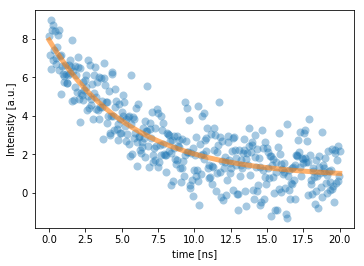

In [43]:
fig, ax = plt.subplots()

# the data
ax.plot(time, values,'o', alpha = 0.4 ,ms = 8)

# the fit, using named arguments
ax.plot(time, exp_decay(time, tau = pars[0], 
                         A = pars[1], 
                         c = pars[2]), lw = 5, 
                         alpha = 0.6)

# add some axis labels again
ax.set_xlabel('time [ns]')
ax.set_ylabel('Intensity [a.u.]')

print(f'Estimated half-life is {pars[0]:.2f}ns.')


You could try loading seaborn into this notebook, adjust the font-sizes and choose a different palette..